<a href="https://colab.research.google.com/github/PatrickRuan/DL2023/blob/main/06_01_first_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
剛載入的資料是 (60000, 28, 28)
我們來觀察第一張訓練資料照片，放置在輸出最下端
第一張照片的標籤資料是 5
Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 0.3593 - accuracy: 0.8998
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1915 - accuracy: 0.9447
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1474 - accuracy: 0.9563
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1246 - accuracy: 0.9637
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1216 - accuracy: 0.9632
用測試資料評估模型的表現 [0.12161637842655182, 0.9631999731063843]
1/1 [==============================] - 0s 61ms/step
用模型推論第一筆資料測試資料 7
根據測試資料的標籤，我們可以知道第一筆資料標籤是 7


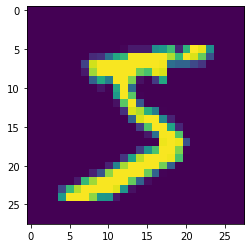

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


# 加載 MNIST 資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'剛載入的資料是 {x_train.shape}')
print(f'我們來觀察第一張訓練資料照片，放置在輸出最下端')
plt.imshow(x_train[0])
print(f'第一張照片的標籤資料是 {y_train[0]}')

# 格式化輸入資料
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 建立一個 DNN 模型
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=784))
model.add(Dense(units=10, activation='softmax'))

# 編譯模型
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 訓練模型
model.fit(x_train, y_train, epochs=5)

# 評估模型
loss, accuracy = model.evaluate(x_test, y_test)

print(f'用測試資料評估模型的表現 {model.evaluate(x_test, y_test)}')
print(f'用模型推論第一筆資料測試資料 {model.predict(x_test[0:1]).argmax()}')
print(f'根據測試資料的標籤，我們可以知道第一筆資料標籤是 {y_test[0]}')